In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [65]:
he_text = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/he_validation.txt'
cama_text = f'/mnt/c/users/tsimk/downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_second.txt'
cama_new_text = f'/mnt/c/users/tsimk/downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_third.txt'

with open(he_text, 'r') as files:
    he_lines = files.readlines()
with open(cama_text, 'r') as files:
    cama_lines = files.readlines()
with open(cama_new_text, 'r') as files:
    new_lines = files.readlines()

In [126]:
true_list = []
false_list = []
rate_list = []
region_list = []
pop_list = []

for ind in range(1860):
    # cama file
    line_new = new_lines[ind]
    parts_new = line_new.split('|')
    parts_new = [item.strip() for item in parts_new]
    ovlp_flg = parts_new[1]
    dwn_flg = parts_new[2]
    region = parts_new[12]
    if ovlp_flg == 'RMVD' or dwn_flg == 'NoMK':
        continue
    pop_list.append(float(parts_new[3])*10**3)

    # he file
    for line in he_lines:
        if int(line.split('|')[0].strip()) == int(ind)+1:
            line_he = line
    parts_he = line_he.split('|')
    parts_he = [item.strip() for item in parts_he]
    true_list.append(int(parts_he[2]))
    false_list.append(int(parts_he[3]))
    rate_list.append(int(parts_he[2])/(int(parts_he[2])+int(parts_he[3])))
    region_list.append(region)

[148, 65, 114, 142, 112, 39, 139, 67, 207, 91, 465, 15]
0.6579953975615543


([<matplotlib.axis.YTick at 0x7fe6f42d8430>,
 [Text(0, 0.0, '0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

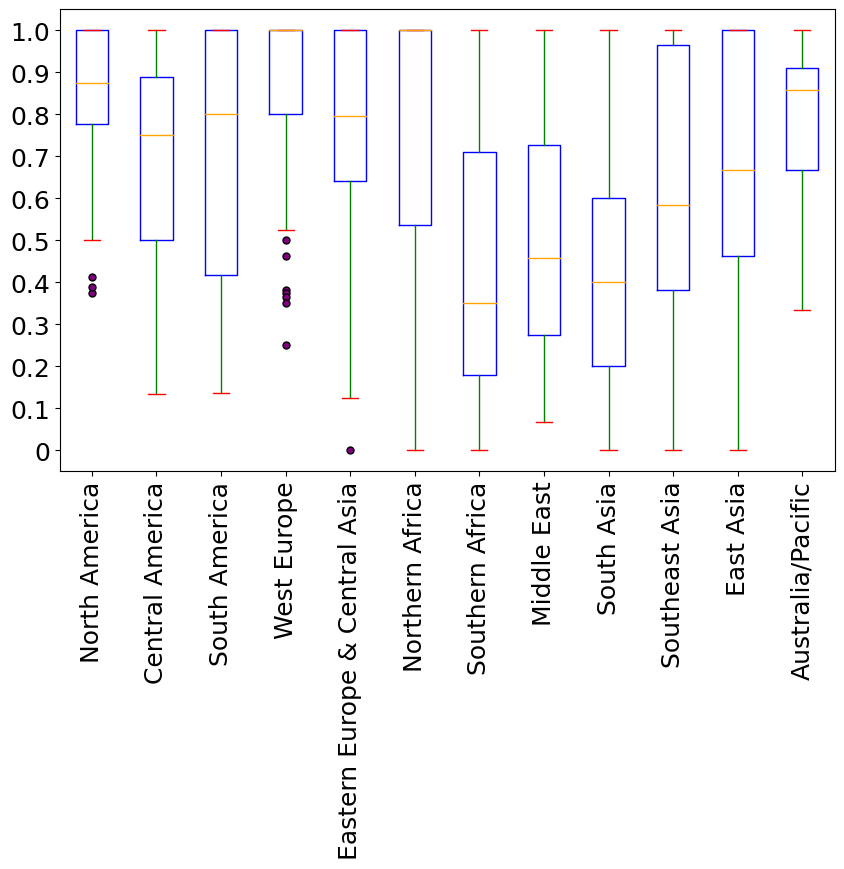

In [85]:
from collections import defaultdict

original_dict = defaultdict(list)

for region, rate in zip(region_list,  rate_list):
    original_dict[region].append(rate)

order = ['North America', 'Central America', 'South America',
         'West Europe', 'Eastern Europe & Central Asia',
         'Northern Africa', 'Southern Africa',
         'Middle East',
         'South Asia', 'Southeast Asia', 'East Asia',
         'Australia/Pacific'
        ]
reordered_dict = {key: original_dict[key] for key in order}
print([len(reordered_dict[key]) for key in order])
print(np.mean(rate_list))

plt.rcParams.update({'font.size': 18}) 
plt.figure(figsize=(10, 6))
plt.boxplot(reordered_dict.values(),
            boxprops=dict(color='blue'),
            capprops=dict(color='red'),
            whiskerprops=dict(color='green'),
            flierprops=dict(markerfacecolor='purple', 
                            marker='o',
                            markersize=5),
            medianprops=dict(color='orange')
           )
plt.xticks(np.arange(1, len(order)+1), order)
plt.xticks(rotation=90)
yaxis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.yticks(yaxis, yaxis)

(-0.08, 1.05)

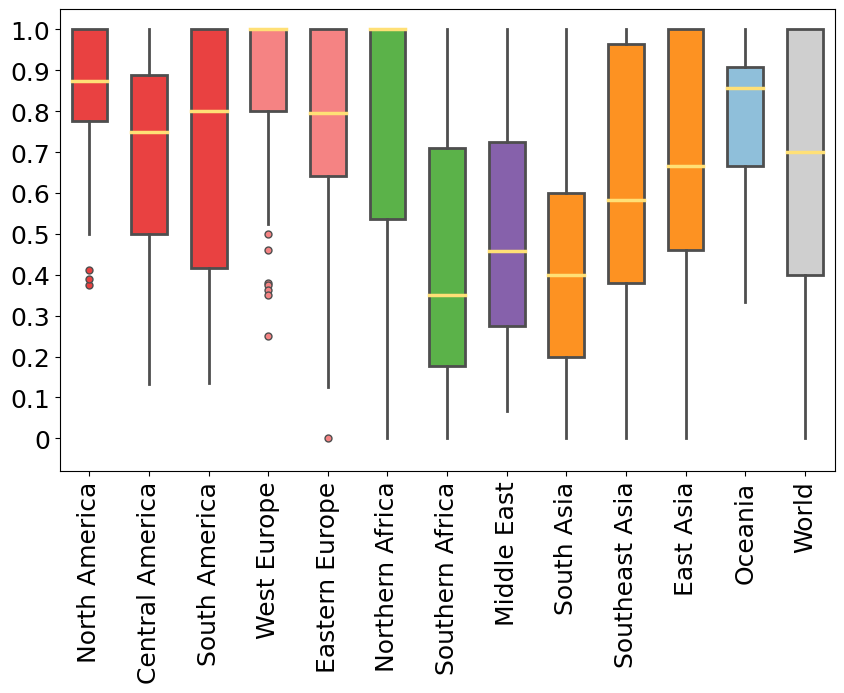

In [148]:
plt.rcParams.update({'font.size': 18}) 
plt.figure(figsize=(10, 6))
name_list = ['North America', 'Central America', 'South America',
             'West Europe', 'Eastern Europe',
             'Northern Africa', 'Southern Africa',
             'Middle East',
             'South Asia', 'Southeast Asia', 'East Asia',
             'Oceania', 'World'
            ]
colors = ['#e94141', '#e94141', '#e94141',
          '#f58383', '#f58383',
          '#5bb249', '#5bb249',
          '#8661ab',
          '#fd9222', '#fd9222', '#fd9222',
          '#8fbfda',
         ]
# 各グループに対してボックスプロットを描画
for i, (key, values) in enumerate(reordered_dict.items()):
    box = plt.boxplot(values, 
                positions=[i+1],  # ボックスを並べるために位置を調整
                boxprops=dict(color='#4e4e4e', linewidth=2),      # ボックスの色
                capprops=dict(color='none'),      # キャップの色
                whiskerprops=dict(color='#4e4e4e', linewidth=2),  # 髭の色
                flierprops=dict(markerfacecolor=colors[i], markeredgecolor='#4e4e4e', marker="o", markersize=5),  # 外れ値の色
                medianprops=dict(color='#ffe076', linewidth=2.5),    # 中央値線の色（共通）
                widths=0.6,
                patch_artist=True)  # パッチを有効にしてボックスの塗りつぶしを有効化
        # ボックスの塗りつぶしの色を設定
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
        
summ = plt.boxplot(rate_list,
            positions=[len(reordered_dict)+1],
            boxprops=dict(color='#4e4e4e', linewidth=2),      # ボックスの色
            capprops=dict(color='none'),      # キャップの色
            whiskerprops=dict(color='#4e4e4e', linewidth=2),  # 髭の色
            medianprops=dict(color='#ffe076', linewidth=2.5),    # 中央値線の色（共通）
            widths=0.6,
            patch_artist=True)  # パッチを有効にしてボックスの塗りつぶしを有効化
for patch in summ['boxes']:
    patch.set_facecolor('#cfcfcf')

plt.xticks(np.arange(1, len(order)+2), name_list)
plt.xticks(rotation=90)
yaxis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.yticks(yaxis, yaxis)
plt.ylim(-0.08, 1.05)


(0.0, 115.0)

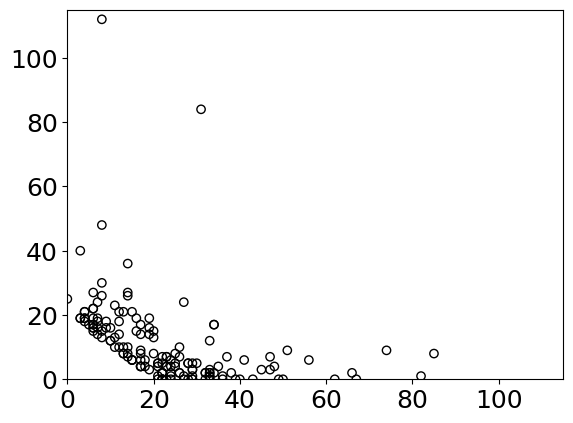

In [61]:
#この散布図からだとあまり傾向をとらえることができない
# つまり，正解率だけで判断していいのではないか？

selected_true = []
selected_false = []
for i, j in zip(true_list, false_list):
    count = i + j
    if count > 20:
        selected_true.append(i)
        selected_false.append(j)
        
#plt.scatter(true_list, false_list, facecolor='none', color='black')
plt.scatter(selected_true, selected_false, facecolor='none', color='black')
plt.xlim(0, 115)
plt.ylim(0, 115)

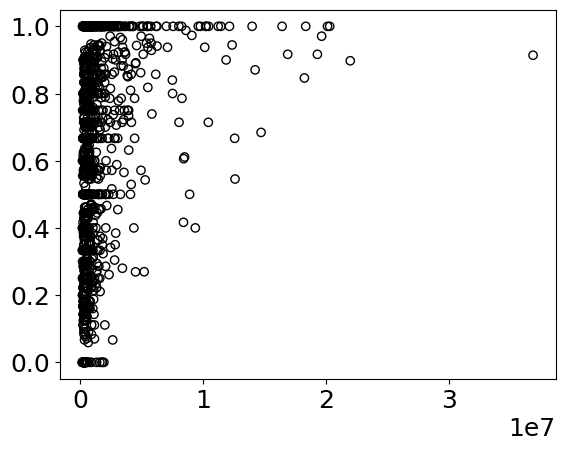

In [128]:
#この散布図からだとあまり傾向をとらえることができない
# つまり，正解率だけで判断していいのではないか？

plt.scatter(pop_list, rate_list, facecolor='none', color='black')

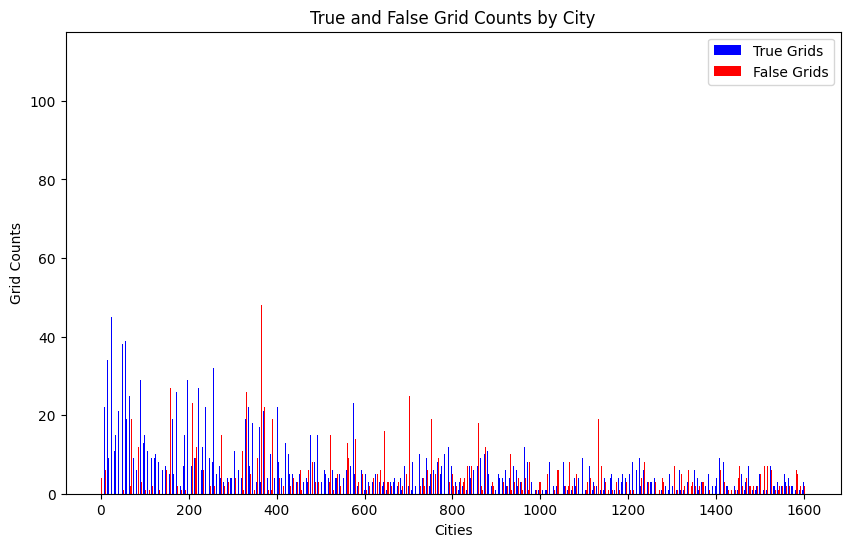

In [17]:
# 棒グラフを描画
bar_width = 0.35
index = np.arange(len(true_list))

plt.figure(figsize=(10, 6))

# TrueグリッドとFalseグリッドをそれぞれ描画
plt.bar(index, true_list, bar_width, label='True Grids', color='b')
plt.bar(index + bar_width, false_list, bar_width, label='False Grids', color='r')

# ラベルとタイトルの設定
plt.xlabel('Cities')
plt.ylabel('Grid Counts')
plt.title('True and False Grid Counts by City')
plt.legend()

# グラフを表示
plt.show()

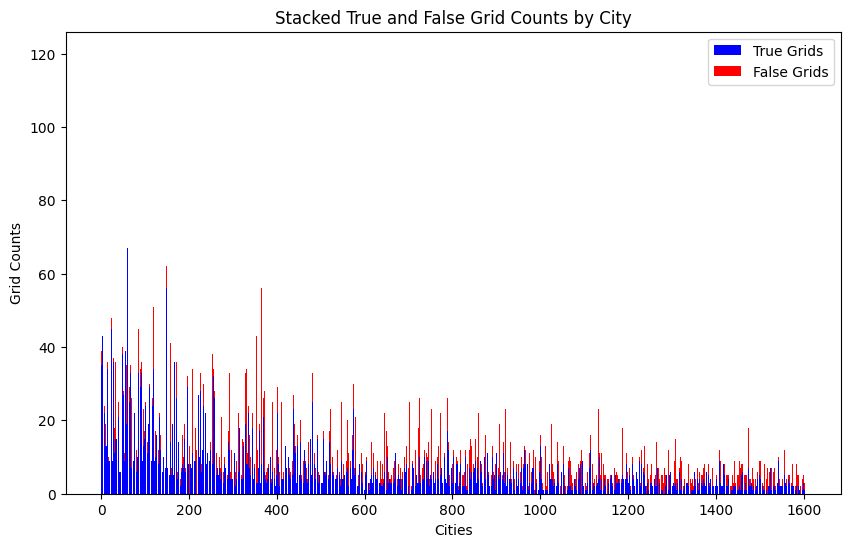

In [18]:
# 積み上げ棒グラフを描画
index = np.arange(len(true_list))
plt.figure(figsize=(10, 6))
plt.bar(index, true_list, label='True Grids', color='b')
plt.bar(index, false_list, bottom=true_list, label='False Grids', color='r')

# ラベルとタイトルの設定
plt.xlabel('Cities')
plt.ylabel('Grid Counts')
plt.title('Stacked True and False Grid Counts by City')
plt.legend()

# グラフを表示
plt.show()

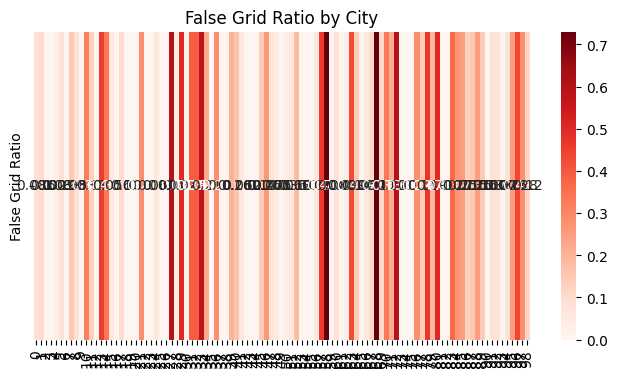

In [59]:
import seaborn as sns

# 各都市のデータ（サンプル）
# Falseグリッドの比率を計算
false_ratio = np.array(false_list) / (np.array(true_list) + np.array(false_list))

# ヒートマップを描画
plt.figure(figsize=(8, 4))
sns.heatmap([false_ratio], annot=True, cmap='Reds', cbar=True, xticklabels=index, yticklabels=['False Grid Ratio'])

# ラベルとタイトルの設定
plt.title('False Grid Ratio by City')

# グラフを表示
plt.show()